In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns, pandas as pd;
import numpy as np
import json

In [23]:
embeddings_dir = "../model_outputs/ics_attack/embeddings/"
models = ["pt_gpt2-xl","gpt2-xl/Epoch_5","gpt2-xl/Epoch_10"]
data_dir = "../../datasets/ics_attack/"
text_emb_dir = embeddings_dir+models[2]+"/"

text_embeddings = np.load(text_emb_dir+'text_embeddings.npy')
text_hop_embeddings = np.load(text_emb_dir+'text_hop_embeddings.npy')


In [24]:
categoryList = []
for i in range(len(text_embeddings)):
    if(i<203):
        categoryList.append('attack')
    else:
        categoryList.append('weakness')

In [25]:

def tsne_plot(all_embeddings,fileName):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for i in range(len(all_embeddings)):
        tokens.append(all_embeddings[i])
        labels.append(i)
    
    tsne_model = TSNE(perplexity=25, n_components=2, init='pca', n_iter=2500, random_state=0)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 15)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(10, 4),
                     textcoords='offset points',
                     fontsize=10,
                     ha='right',
                     va='bottom')

    
    plt.savefig(fileName, dpi=300)
    plt.show()
    return x, y, labels
    

In [26]:
def plot_labeled(x,y,categoryList, title):
    data = pd.DataFrame({'X': x, 'Y': y, 'Category': categoryList})
    
    ax=sns.scatterplot(x='X',y='Y',hue=categoryList,data=data, s=50)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Dimension 1', fontsize=14)
    plt.ylabel('Dimension 2', fontsize=14)
    
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    plt.savefig(text_emb_dir+title+".png", dpi=300, bbox_inches='tight')

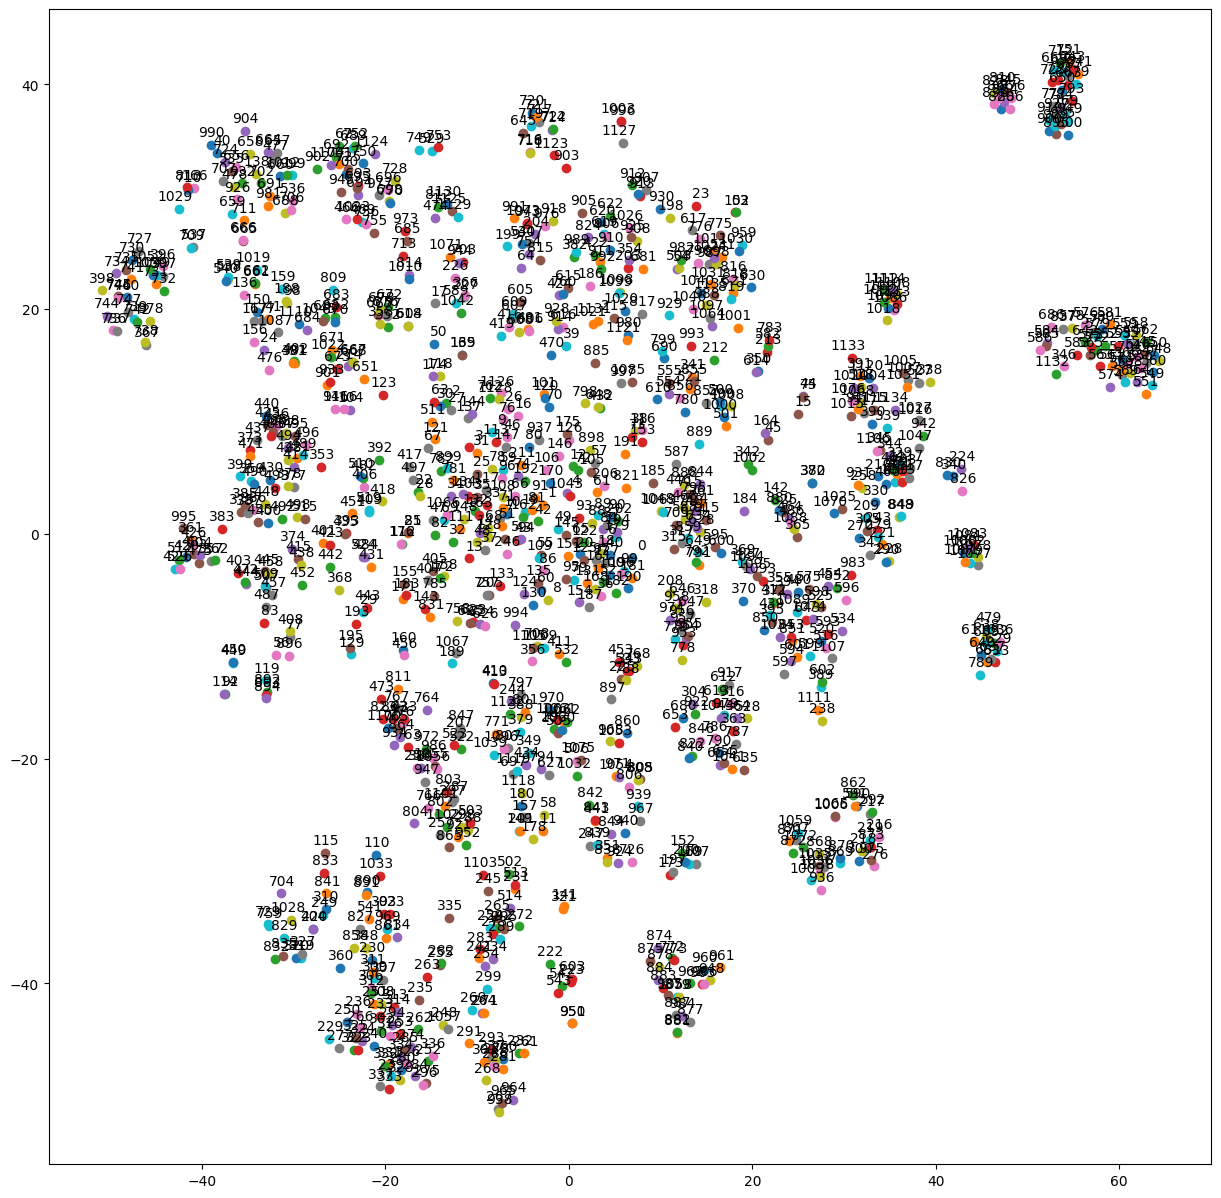

In [27]:
x,y, objNames = tsne_plot(text_hop_embeddings,text_emb_dir+"text_hop_embeddings_tsne.png")

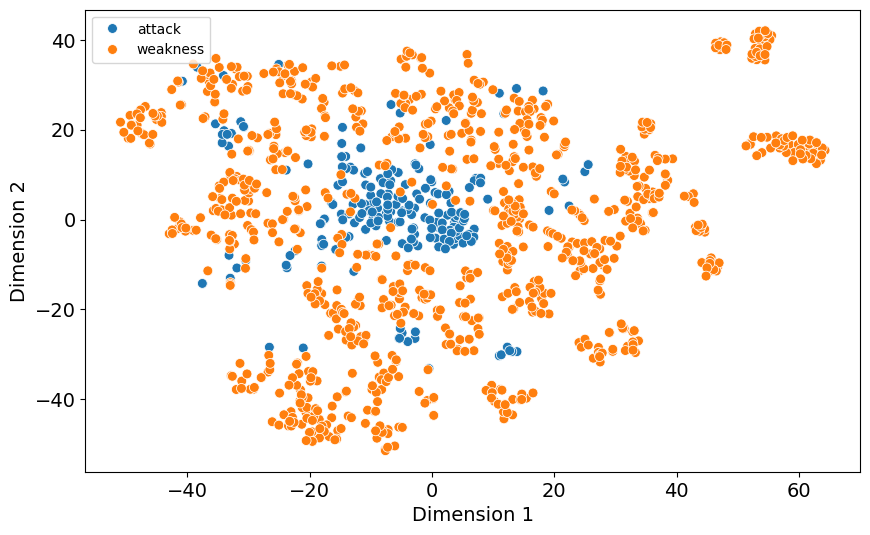

In [28]:
plot_labeled(x,y,categoryList, "labeled_text_hop_embeddings_tsne")

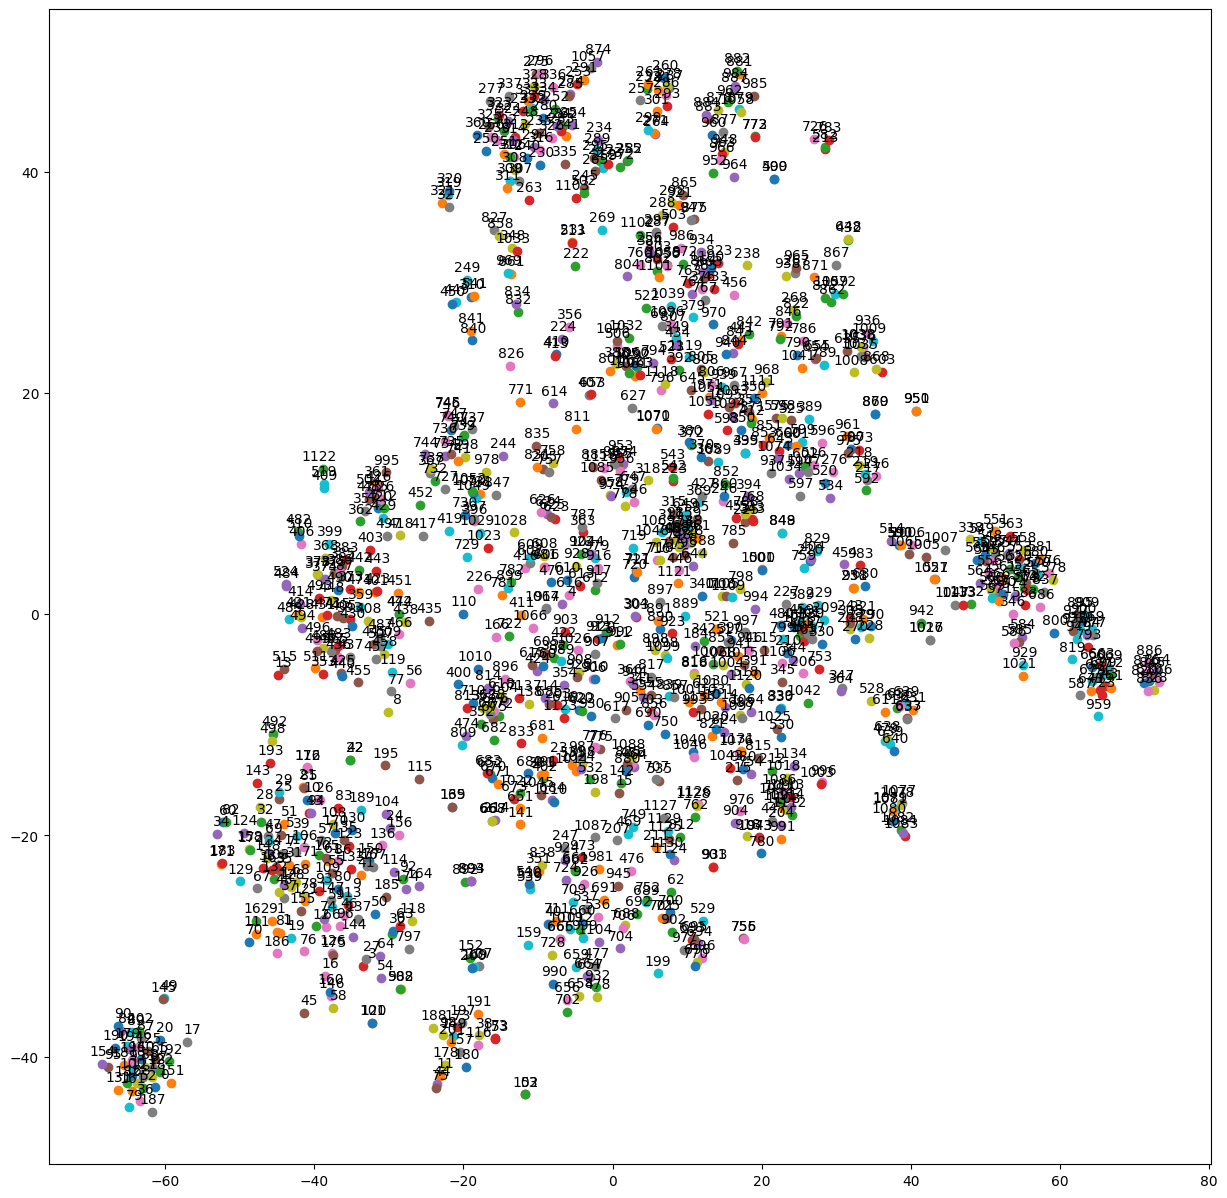

In [29]:
x,y, objNames = tsne_plot(text_embeddings,text_emb_dir+"text_embeddings_tsne.png")

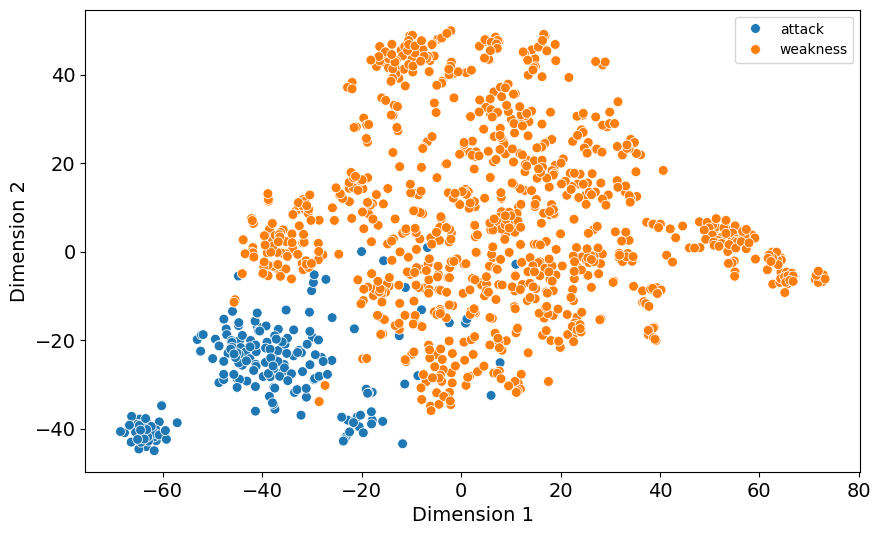

In [30]:
plot_labeled(x,y,categoryList, "labeled_text_embeddings_tsne")